# Deep Learning Final Project

Hello! Welcome to my final project for the deep learning course. Thank you for joining me today. To begin, I wanted to select a deep learning topic that was interesting to me and used unique data. I had a really great time in Week 3 learning about convolutional networks so I wanted to apply more image classification skills using CNNs in this project. I wanted to expand beyond our project in week 3, so I wanted to select a project with multiclass data instead of just binary classification. After searching for some time I located a boats dataset, which really caught my eye. In this dataset, images of different types of boats are provided, 5 types in total. Boats come from the classes of Cargo, Military, Carrier, Cruise, or Tanker. The goal of this project will be to fully explore the data, preprocess, apply model building and training techniques, and finally evaluate with a test set and discuss the findings.

Join throughout the project to explore the code, data, and commentary. Please view the Kaggle Project with slides and see the video as well. I had a ton of fun working through this project, and I hope you enjoy it!

We will begin by loading in our zipped Kaggle boat dataset. The python zipfile package allows us to unzip the dataset from google drive, and then we can access the normal files from the stored location in our repository.

The following chunk completes our packages set up and load in, using basic packages such as pandas and numpy for manipulation; seaborn, matplotlib, and PIL for our plotting and image display; and sklearn for preprocessing and evaluation; and finally tensorflow/keras for the neural network that will provide our heavy lifting.

Join us in the commentary below for next steps!

In [ ]:
import zipfile

zip_file_path = '/content/drive/MyDrive/archive (10).zip'

extracted_dir_path = '/content/dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

In [ ]:
import pandas as pd
import numpy as np

import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Activation,BatchNormalization, ReLU, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection  import train_test_split
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

Now that our data is unzipped, we can load in our data frame using Pandas. Our preliminary dataset has 6,252 images along with a category. All image files are populated in the dataframe, with no Null values, but we will have to inspect the images to see whether all 6,252 images are populated.

In [ ]:
train = pd.read_csv('/content/dataset/train/train.csv')


In [ ]:
train.head()

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6252 entries, 0 to 6251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image     6252 non-null   object
 1   category  6252 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 97.8+ KB


Using the below function, we can iterate through the filenames above, loading each image for viewing. Here, we will exclude non conforming image shapes and sizes, along with unpopulated images. We then load in one image to ensure the function is working accurately. We see our first image of a ship!

ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad shape
ignore - bad

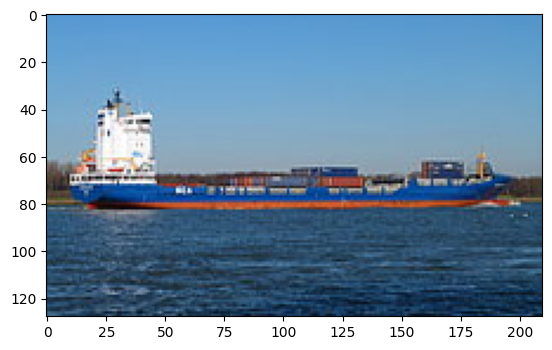

In [ ]:
image_dir = '/content/dataset/train/images/'

images = []
labels = []

for file_name in train['image']:
    image_path = os.path.join(image_dir, file_name)
    with Image.open(image_path) as img:
            img = img.resize((210, 128))
            img_array = np.array(img)
            if img_array.shape == (128, 210, 3):
                images.append(img_array)
                labels.append(train[train['image'] == file_name]['category'].values[0])
            else:
                print(f"ignore - bad shape")

imagesar = np.array(images)

plt.imshow(imagesar[0])
plt.show()

# EDA

After removing non conforming images, our data is now clean. We have 6,148 images, dropping 104 images from the original dataset of all file extensions. These 104 images would not conform with our process in model building and evaluation. Here we can see our loaded array of 6,148 images each being 128x210 pixels. Finally, we have a 3 in our final dimension to represent the image color in RGB values, where each pixel is represented by a Red, Green, and Blue numerical value. As a final check, we also see below that we have 6,148 labels as expected.

Our categories are labeled in numbers where 1 represents Cargo ships, 2 represents Military ships, 3 represents Carriers, 4 for Cruise ships, and 5 for Tankers. Cargo ships include all ships that carry cargo, specifically in cargo crates, often carrying hundreds to thousands of these crates. Military ships are all images of ships designated for miltary use, often carrying weapons or special radar equipment for military purpose. Carriers refer to ships that carry dry goods, similar to cargo but without the crates. This could include products such as rice or other agricultural products and raw materials. Cruise ships represent leisure ships for vacationers, often having hundreds of rooms above deck for guests. Tankers represent ships carrying oil, gas, and other energy sources and liquids. These often are quite similar ships to cargo, but repurposed for their liquid purposes.

In the following chunks, we remap the number variables to words so it is easier to understand and follow. Then, we will plot our data and begin exploring the ships in the dataset.

In [ ]:
imagesar.shape

(6148, 128, 210, 3)

In [ ]:
len(labels)

6148

In [ ]:
cats = {1: 'Cargo',
2: 'Military',
3: 'Carrier',
4: 'Cruise',
5: 'Tankers'}

train['labels'] = train['category'].map(cats)



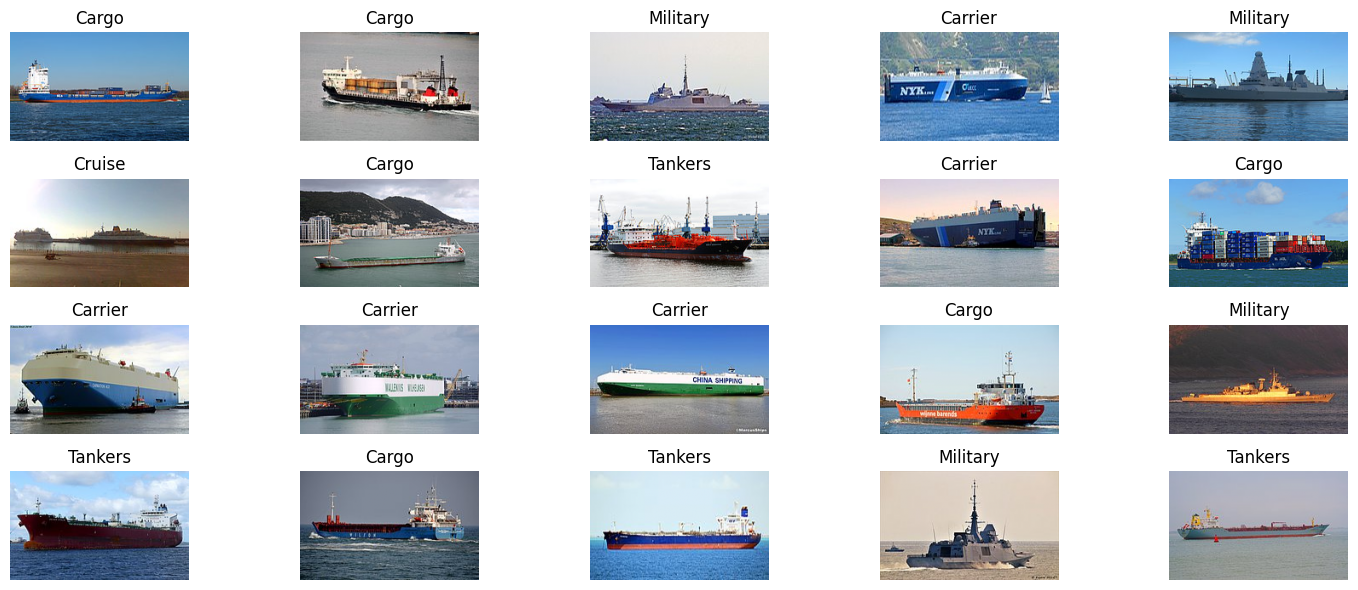

In [ ]:
def labelsimage(images, labels, rows=2, cols=5):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 6))
    axes = axes.flatten()
    for img, label, ax in zip(images, labels, axes):
        ax.imshow(img)
        ax.set_title(label)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

labelsimage(imagesar[:20], train['labels'][:20], rows=4, cols=5)

Above, we can see 20 images with labeled ships. We can immediately start to recognize some patterns even in just the small sample size we have. Carriers, with their requirements for grain and raw good storage, have large raised decks with huge receptacles for storage, and look very much rounded. Out of all the class types, carriers look very similar to each other, and quite unique from all other classes. It is my prediction our model will not have a problem identifying these ships. Two classes that seem fairly unique as well are military and cruise ships, as each has a very unique purpose with comes with visual and design differences. I expect there to be some mixups here, but generally these also look straightforward.

My biggest concern is between tankers and cargo ships. First off, these ships have similar functions, carrying cargo but split between crates and liquids. While cargo ships often have crates on them, some of the images have cargo ships with empty decks or below deck storage, which appear quite similar to tankers. I would expect the CNN to have a tough time here, and would expect this to be the primary area of concern.

In [ ]:
train['labels'].value_counts()

labels
Cargo       2120
Tankers     1217
Military    1167
Carrier      916
Cruise       832
Name: count, dtype: int64

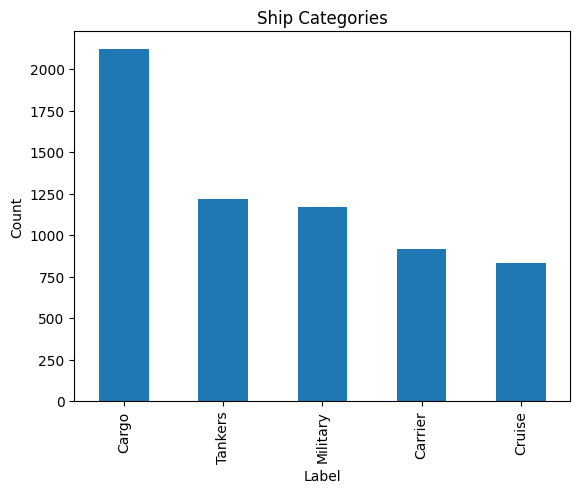

In [ ]:
train['labels'].value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Ship Categories')
plt.show()

Above, we now examine the breakout of types of ships. We have the most cargo ships by a significant margin, a total of 2,120 followed by tankers at 1,217. These 2 categories are the most similar and present some early challenges for our model. These classes dominating the frequency could pose challenges for our model efficiency. At 832 images, the least amount includes cruise ships, less than half of the cargo ships. Our dataset is fairly unbalanced, but not unmanageable, and should present no issues for evaluating based on accuracy, recall, precision, and F1 score.

Now that we have explored our various ship options, identified areas of concern or ease for training, and explored the class makeup, we have a much better understanding of our ship data. The next section includes steps for preparing the images and dataset for training with tensorflow, so please join below as we proceed.

# Dataset Model Prep

First, we standardize our pixel values. Because pixels run on a 3 value RGB scale between 0 and 255, it is better to have them between 0 and 1 for a standard scale. Thus, we divide by 255 to scale and confirm this occured.

Additionally, while we interpret the boats by their names instead of their numerical values (1-5) the neural network best interprets numerical values, so we want to use the number values. Because of how indexing in python works, especially with classification, we want to start our index at 0. Thus, we subtract 1 from each group so the group codes run 0-4. This does not impact any of our categories and how we interpret them, but does allow our model to process the various classes.

In [ ]:
imagesar = imagesar / 255.0

In [ ]:
imagesar

array([[[[0.32941176, 0.6       , 0.82352941],
         [0.32941176, 0.6       , 0.82352941],
         [0.32941176, 0.6       , 0.82352941],
         ...,
         [0.3254902 , 0.58039216, 0.79215686],
         [0.33333333, 0.58039216, 0.79215686],
         [0.33333333, 0.58039216, 0.79215686]],

        [[0.32941176, 0.6       , 0.82352941],
         [0.32941176, 0.6       , 0.82352941],
         [0.32941176, 0.6       , 0.82352941],
         ...,
         [0.32941176, 0.58431373, 0.79607843],
         [0.33333333, 0.58039216, 0.79215686],
         [0.33333333, 0.58039216, 0.79215686]],

        [[0.33333333, 0.60392157, 0.82745098],
         [0.33333333, 0.60392157, 0.82745098],
         [0.33333333, 0.60392157, 0.82745098],
         ...,
         [0.32941176, 0.58823529, 0.79215686],
         [0.3254902 , 0.58039216, 0.79215686],
         [0.3254902 , 0.58039216, 0.79215686]],

        ...,

        [[0.14509804, 0.25490196, 0.34509804],
         [0.1254902 , 0.22745098, 0.32156863]

In [ ]:
labels = np.array(labels)

In [ ]:
labels = labels - 1

In [ ]:
labels

array([0, 0, 1, ..., 4, 2, 0])

Now, we want to create a training set and a test set. Using sklearn's built in function, we can split our dataset in an 80/20 train/test versions. This way we separate our test set from the training process to truly evaluate our model on brand new data. Often models can become overfit, so it is important to validate a model with fresh data. The test data will be reserved until the end for evaluation.

Separately, we reserve a further 25% of the training set for validation. This data will be used during the training process to stop the model when overfitting begins to occur. This is very important or else the neural net will fit perfectly to the training data.

The final step is to create a tensorflow friendly dataset using tensorslices, and create batches to run throught the model. After the below chunks, our data is fully processed and ready for training and evaluation. Join below for a model architecture discussion.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(imagesar, labels, test_size=0.2, random_state=16)


In [ ]:
x_train, x_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=16)


In [ ]:
traintf = tf.data.Dataset.from_tensor_slices(  (x_train ,y_train1) ).repeat()
valtf = tf.data.Dataset.from_tensor_slices(  (x_val ,y_val) ).repeat()
testtf = tf.data.Dataset.from_tensor_slices(  (X_test ,y_test) )


In [ ]:
batch_size = 32
traintf = traintf.shuffle(buffer_size=len(X_train)).batch(batch_size)
valtf = valtf.batch(batch_size)
testtf = testtf.batch(batch_size)

# Model Architecture

Now, we have finally reached the core parts of the model building and training. Here, we will setup our model architecture. As we did in Week 2, we will use a convolutional neural network, which allows us to use filters and pooling to identify features in the images. We will try many different models during training, where a summary of the highlights can be viewed below in the next section with results. The core model revolves around several layers of convolution, pooling, dropout, batch normalization, before the features are fed into a fully connected artificial neural network. Using different combinations of these layers along with a learning rate drives our training methodology. Below, you can see just the architecture of the final model. Our sequential Keras model takes in images of 128x210 pixels with 3 color values. Here we use 2 convolution layers, a pooling layer, and a dropout layer which are units repeated 3 times. As we proceed, we increase the number of filters to detect more features. Using ReLU activation functions allows us to process the numerical nature of the data. Dropout layers allow us to prevent overfitting during training, by forcing the model to use different combinations of weights. In the training process, overfitting was a problem, with a relatively small training image set. These dropout layers prevented significant overfitting. After our pooling layers, we connect to a regular artifical neural network to process the filter results, and provide an output. Our final layer is 5 output neurons, representing the 5 boat categories. Here we use a softmax activation function, which is useful for multiclass classification.

The following chunk is our training chunk, where we train models. Models are run using the training data and validation data, where we implement an early stopping of the training data if the validation accuracy decreases, which is a key sign of overfitting.

In [ ]:
model = Sequential()
model.add(Conv2D(25, (3,3), activation = 'relu', input_shape = (128, 210, 3)))
model.add(Conv2D(25, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(50, (3,3), activation = 'relu'))
model.add(Conv2D(50, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(100, (3,3), activation = 'relu'))
model.add(Conv2D(100, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(5, activation = "softmax"))

opt = Adam(0.0005)
model.compile(opt, loss = "sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_78 (Conv2D)          (None, 126, 208, 25)      700       
                                                                 
 conv2d_79 (Conv2D)          (None, 124, 206, 25)      5650      
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 62, 103, 25)       0         
 ng2D)                                                           
                                                                 
 dropout_37 (Dropout)        (None, 62, 103, 25)       0         
                                                                 
 conv2d_80 (Conv2D)          (None, 60, 101, 50)       11300     
                                                                 
 conv2d_81 (Conv2D)          (None, 58, 99, 50)        22550     
                                                      

# Training

In [ ]:
from keras.callbacks import EarlyStopping

train_steps_per_epoch = len(x_train)
val_steps_per_epoch = len(x_val)

early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)

history = model.fit(traintf,
    validation_data=(valtf),
    steps_per_epoch=train_steps_per_epoch,
    epochs=10,
    validation_steps=val_steps_per_epoch,
    callbacks=[early_stopping]
)

Epoch 1/10
3688/3688 [==============================] - 148s 39ms/step - loss: 0.5820 - accuracy: 0.7582 - val_loss: 1.4002 - val_accuracy: 0.7325
Epoch 2/10
3688/3688 [==============================] - 144s 39ms/step - loss: 0.0935 - accuracy: 0.9683 - val_loss: 1.5728 - val_accuracy: 0.7772


In this section, we will discuss our training results. The full evaluation of the final model is found below, where we evaluate on the test data. Here we use some of the metrics from the test data found below. In total, I trained 12 models, using different combinations and architectures as we saw above. This section will highlight some of the improvements that were made. Six models are overviewed below, where the remaining six were slight tweaks to the architecture.

Models:
1. 3 convolution layers, pooling layer, dropout, 3 convolution layers, pooling layer, dropout layer, 2 convolution layer, pooling layer, 0.25 dropout values. 0.001 Learning rate with Adam Optimizer. Large fully connected ANN to finish. Here we immediately saw lots of overfitting in our training data, with the training accuracy approaching 99%. Validation accuracy = 0.7114 Test Accuracy: 0.702 Test F1 score: 0.703.

Our preliminary issues here include significant overfitting, something we can improve by making our model simpler in the next step.

2. 2 convolution layers, pooling layer, dropout, 2 convolution layers, pooling layer, dropout layer, 1 convolution layer, pooling layer, 0.25 dropout values. 0.0001 Learning rate with Adam Optimizer. Small fully connected ANN to finish. Here we still saw some overfitting in our training data, with the training accuracy approaching 96%. Validation accuracy = 0.74 Test Accuracy: 0.699 Test F1 score: 0.698.

Our issues here include some overfitting, and a falling accuracy. The next model takes steps to prevent the overfitting.

3. 3 convolution layers, pooling layer, dropout, 3 convolution layers, pooling layer, dropout layer, 2 convolution layers, pooling layer, 0.5 dropout values. 0.0001 Learning rate with Adam Optimizer. Small fully connected ANN to finish. Here we see our first big decrease in overfitting; the dropout layers preventing significant overfitting. Validation accuracy = 0.71 Test Accuracy: 0.718 Test F1 score: 0.722.

This model makes improvements on overfitting and accuracy issues and is a large step in the right direction.

4. 3 convolution layers, pooling layer, dropout, 3 convolution layers, pooling layer, dropout layer, 2 convolution layers, pooling layer, 3 convolution layers, pooling layer, dropout, 0.5 dropout values. 0.0001 Learning rate with Adam Optimizer. Small fully connected ANN to finish. Here we see the decrease in overfitting, but the increased complexity hurts the accuracy significantly. Validation accuracy = 0.64 Test Accuracy: 0.66 Test F1 score: 0.66.

This model makes improvements on overfitting but complexity hurts the accuracy, so the simple model was better.

5. 3 convolution layers, pooling layer, dropout, 3 convolution layers, pooling layer, dropout layer, 0.5 dropout values. 0.0001 Learning rate with Adam Optimizer. Small fully connected ANN to finish. Here we go in the wrong direction, with a model that is too simple significantly hurting our accuracy significantly. Validation accuracy = 0.64 Test Accuracy: 0.59 Test F1 score: 0.58.

Here, a simple model hurts us significantly. There is a sweet spot, where we are not too complex but not too simple.

6. After tweaking the models above we end with our final model. This model is displayed and discussed above. Validation accuracy = 0.77 Test Accuracy: 0.734 Test F1 score: 0.738. The most important traits found through the training processes include using 3 units of convolution/pooling, dropout layers to prevent overfitting, and using a small, but not too small learning rate. This process was quite informative and over time identified the most important traits in a model. While 73.4% may not seem very high, there is no leaderboard, but comparing other models in the Kaggle code section produce similar results. Thus, it seems our model is quite efficient, especially when considering it is a multiclass problem with 5 categories.

The next section includes the test set validation and further discussion of the results using the final model.


# Evaluation

Now, we can use our trained final model, and execute it on the final test set. Now, we can evaluate on the final data for interpretation.

In [ ]:
preds = model.predict(X_test)

39/39 [==============================] - 1s 12ms/step


In [ ]:
preds

array([[3.0870775e-05, 4.8546926e-12, 3.6351149e-09, 4.1912203e-09,
        9.9996912e-01],
       [4.0284434e-07, 1.3626629e-14, 5.4135915e-12, 8.2222798e-11,
        9.9999964e-01],
       [9.9189758e-01, 2.8912479e-03, 3.7443028e-06, 1.3068401e-07,
        5.2071512e-03],
       ...,
       [8.5540134e-01, 4.9399051e-11, 1.2473985e-08, 1.5045758e-11,
        1.4459865e-01],
       [4.3559980e-06, 9.9999344e-01, 7.3004848e-08, 2.0557527e-06,
        1.9602784e-09],
       [8.2255703e-01, 2.6628235e-03, 1.3486242e-02, 1.6056047e-01,
        7.3340174e-04]], dtype=float32)

In [ ]:
y_test

array([4, 4, 0, ..., 4, 1, 3])

In [ ]:
preds.argmax(axis=1)

array([4, 4, 4, ..., 4, 1, 1])

In [ ]:
conf = confusion_matrix(y_test, preds.argmax(axis=1))

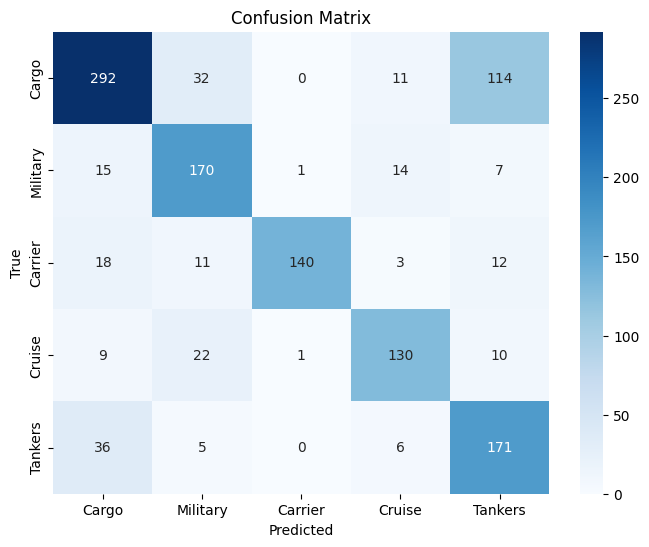

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=cats.values(), yticklabels=cats.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("Accuracy:", accuracy_score(y_test, preds.argmax(axis=1)))
print("F1 Score:", f1_score(y_test, preds.argmax(axis=1), average='weighted'))

Accuracy: 0.7341463414634146
F1 Score: 0.7389354680078314


Above, we see the confusion matrix for our model predicted values on the x axis, and the true results on the y axis. Below we see that we have a final accuracy of 73.4%. As we discussed in the preliminary data preprocessing section, the hardest boats to differentiate included cargo ships and tankers. As we see above, there are 327 total misclassifications, 150 are between cargo ships and tankers. This represents 45% of all misclassifcations and is where our model ran into the most issues. This makes sense based on our hypotheses where these ships are designed very similarly, at least in form. Additionally, we predicted Carrier's would have minimal classification issues. 46 total misclassifications occured here, only 14% of the misclassifications. This was by far the lowest of all categories, and can be attributed to the unique form and function of Carriers. While our model was quite accurate, it is clear improvements can be made. First off, overfitting was an issue due to small data amounts, but sourcing more data could be a future fix for this. In training, we learned that is what very important to find middle ground with model complexity, overfitting and having quality data. One part I would like to research is combining categories for tankers and cargo ships, as both their form and function are quite similar. I would like to revisit this data in the future and make further improvements, using more CNNs and trying some new methods as well.  Overall, I learned a ton in both this project and in the class as a whole. I hope you enjoyed my ships image classifier! Thanks for joining!